# Agricultral producitivity analysis.

In [1]:
# reading data on google drive
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

# Load CSV file from Google Drive
file_path = '/content/drive/MyDrive/other/data/Data for MSC Thesis/eth_householdgeovariables_y5.csv'
df = pd.read_csv(file_path)

print(df.head())

Mounted at /content/drive
        household_id  dist_road  dist_market  dist_border  dist_popcenter  \
0  20101010100104011        7.7   162.300003    82.900002             0.4   
1  20101010100104022        7.7   162.300003    82.900002             0.4   
2  20101010100104033        7.7   162.300003    82.900002             0.4   
3  20101010100104044        7.7   162.300003    82.900002             0.4   
4  20101010100104055        7.7   162.300003    82.900002             0.4   

   dist_admhq  af_bio_1_x  af_bio_8_x  af_bio_12_x  af_bio_13_x  ...  \
0         0.0         283         307          184           47  ...   
1         0.0         283         307          184           47  ...   
2         0.0         283         307          184           47  ...   
3         0.0         283         307          184           47  ...   
4         0.0         283         307          184           47  ...   

   c2_evimax_avg  c2_grn_avg  c2_sen_avg  c2_h2021_eviarea  c2_h2021_evimax  \

In [2]:
# ------------------------------
# DATA EXPLORATION: NULL AND OUTLIER PERCENTAGE
# ------------------------------

# ------------------------------
# Step 1: Dataset Overview
# ------------------------------
print("----- Dataset Info -----")
print(df.info())

print("\n----- Dataset Shape -----")
print(df.shape)

print("\n----- Statistical Summary -----")
print(df.describe())

# ------------------------------
# Step 2: Missing Values by Percentage
# ------------------------------
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\n----- Missing Values Summary -----")
print(missing_df.sort_values(by='Percentage', ascending=False))

# ------------------------------
# Step 3: Outlier Detection by Percentage (Numeric Columns Only)
# ------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

outlier_summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100

    outlier_summary.append([col, outlier_count, outlier_percent])

outlier_df = pd.DataFrame(outlier_summary, columns=['Column', 'Outlier Count', 'Outlier %'])
print("\n----- Outlier Summary by Percentage -----")
print(outlier_df.sort_values(by='Outlier %', ascending=False))

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   household_id       4890 non-null   int64  
 1   dist_road          4890 non-null   float64
 2   dist_market        4890 non-null   float64
 3   dist_border        4890 non-null   float64
 4   dist_popcenter     4890 non-null   float64
 5   dist_admhq         4890 non-null   float64
 6   af_bio_1_x         4890 non-null   int64  
 7   af_bio_8_x         4890 non-null   int64  
 8   af_bio_12_x        4890 non-null   int64  
 9   af_bio_13_x        4890 non-null   int64  
 10  af_bio_16_x        4890 non-null   int64  
 11  afmnslp_pct        4890 non-null   int64  
 12  srtm_1k            4890 non-null   int64  
 13  popdensity         4890 non-null   int64  
 14  cropshare          4890 non-null   int64  
 15  sq1                4890 non-null   int64  
 16 

In [3]:
#----------------------------------------
#1 Drop columns with more than 40% missing
#----------------------------------------
missing_threshold = 0.4
cols_to_drop = df.columns[df.isnull().mean() > missing_threshold]

print("Dropping columns:", cols_to_drop.tolist())
df = df.drop(columns=cols_to_drop)

# 2. Remove spatial leakage
df = df.drop(columns=['lat_dd_mod', 'lon_dd_mod'], errors='ignore')

# 3. Winsorize numeric features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if col not in ['household_id', 'AI_pca1']:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df[col] = df[col].clip(lower, upper)

Dropping columns: ['c2_eviarea_avg', 'c2_evimax_avg', 'c2_grn_avg', 'c2_sen_avg', 'c2_h2021_eviarea', 'c2_h2021_evimax', 'c2_h2021_grn', 'c2_h2021_sen']



COMPREHENSIVE CORRELATION AND VIF ANALYSIS

1. PREPARING ALL DATA COLUMNS
----------------------------------------
Total numerical columns in df: 40
Including target column: evimax_avg

Analyzing 40 columns total:

2. CORRELATION HEATMAP (WITH VALUES)
----------------------------------------


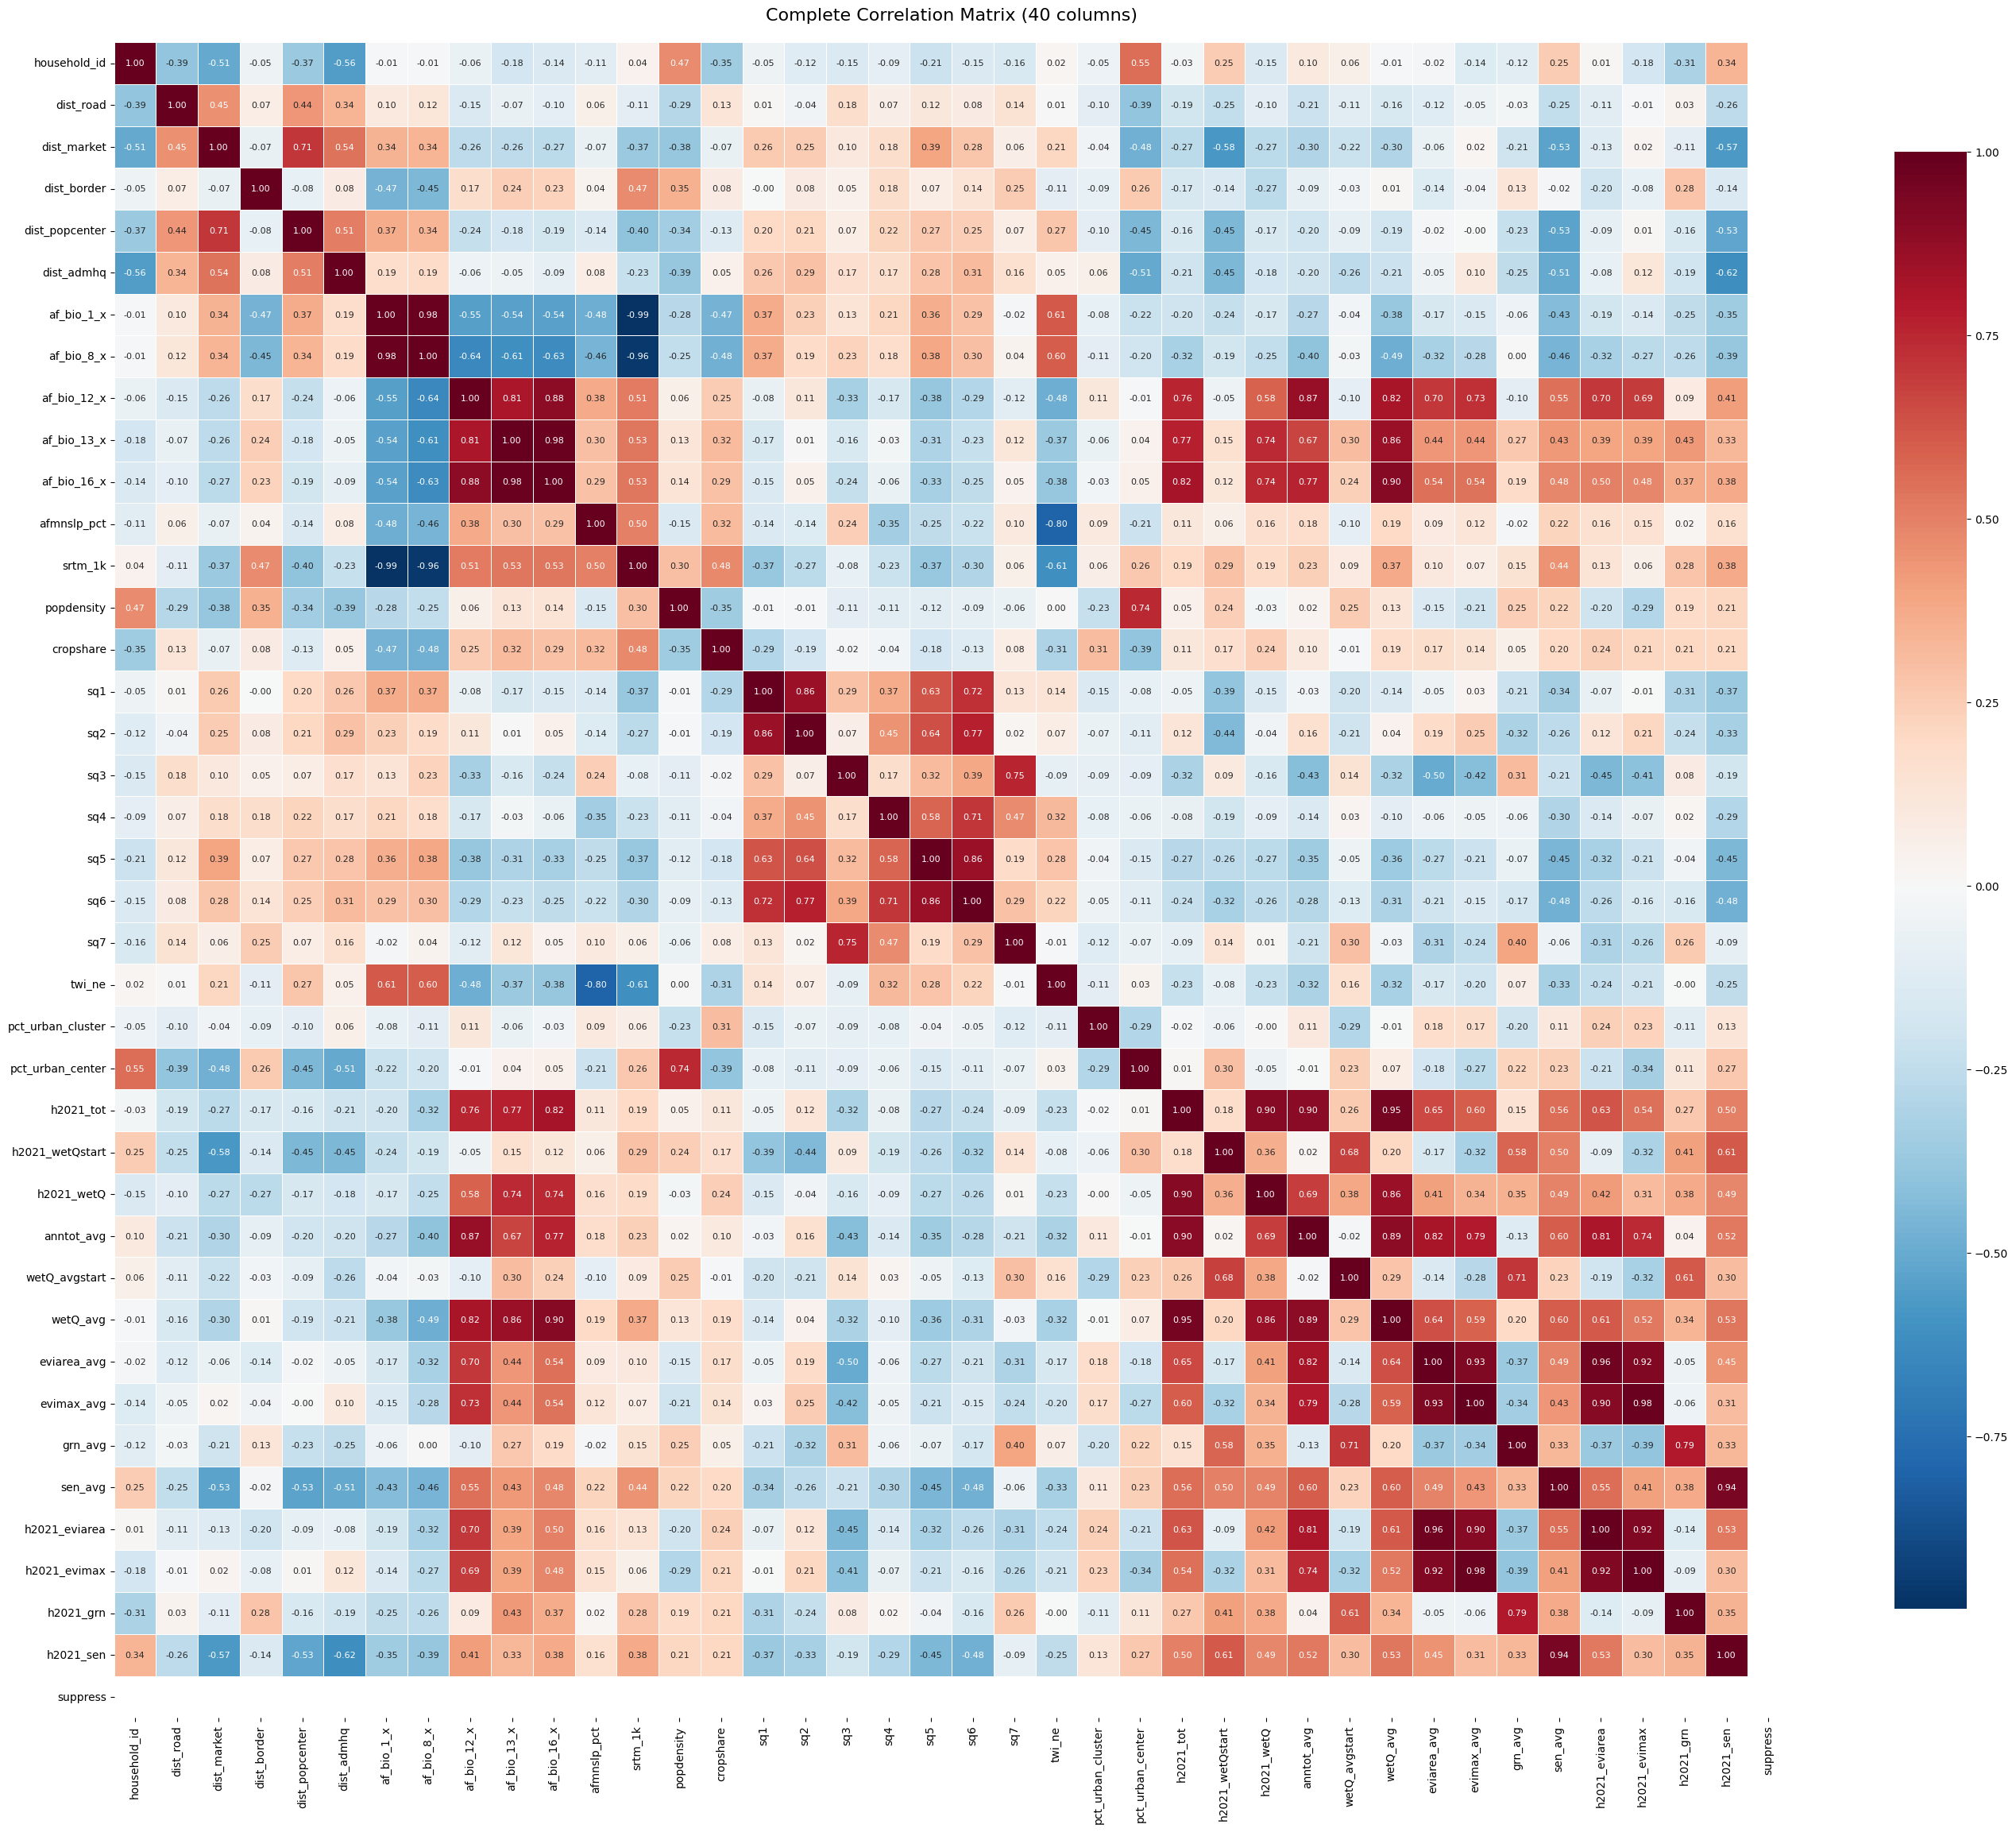


3. TARGET CORRELATION ANALYSIS
----------------------------------------

4. VIF ANALYSIS FOR ALL NUMERICAL FEATURES
----------------------------------------
Calculating VIF for 39 features...


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



VIF RESULTS SUMMARY:
------------------------------------------------------------
Feature                        VIF      Status      
------------------------------------------------------------
🔴 h2021_tot                       26.10 HIGH VIF    
🔴 wetQ_avg                        22.38 HIGH VIF    
🔴 af_bio_13_x                     19.88 HIGH VIF    
🔴 anntot_avg                      13.21 HIGH VIF    
🔴 af_bio_12_x                     10.34 HIGH VIF    
🟡 af_bio_16_x                      8.09 MODERATE    
🟡 household_id                     5.21 MODERATE    
🟢 h2021_eviarea                    4.48 OK          
🟢 h2021_evimax                     4.27 OK          
🟢 eviarea_avg                      3.83 OK          
🟢 af_bio_1_x                       2.82 OK          
🟢 pct_urban_center                 2.66 OK          
🟢 af_bio_8_x                       2.36 OK          
🟢 srtm_1k                          2.35 OK          
🟢 grn_avg                          2.20 OK          
🟢 cropsh

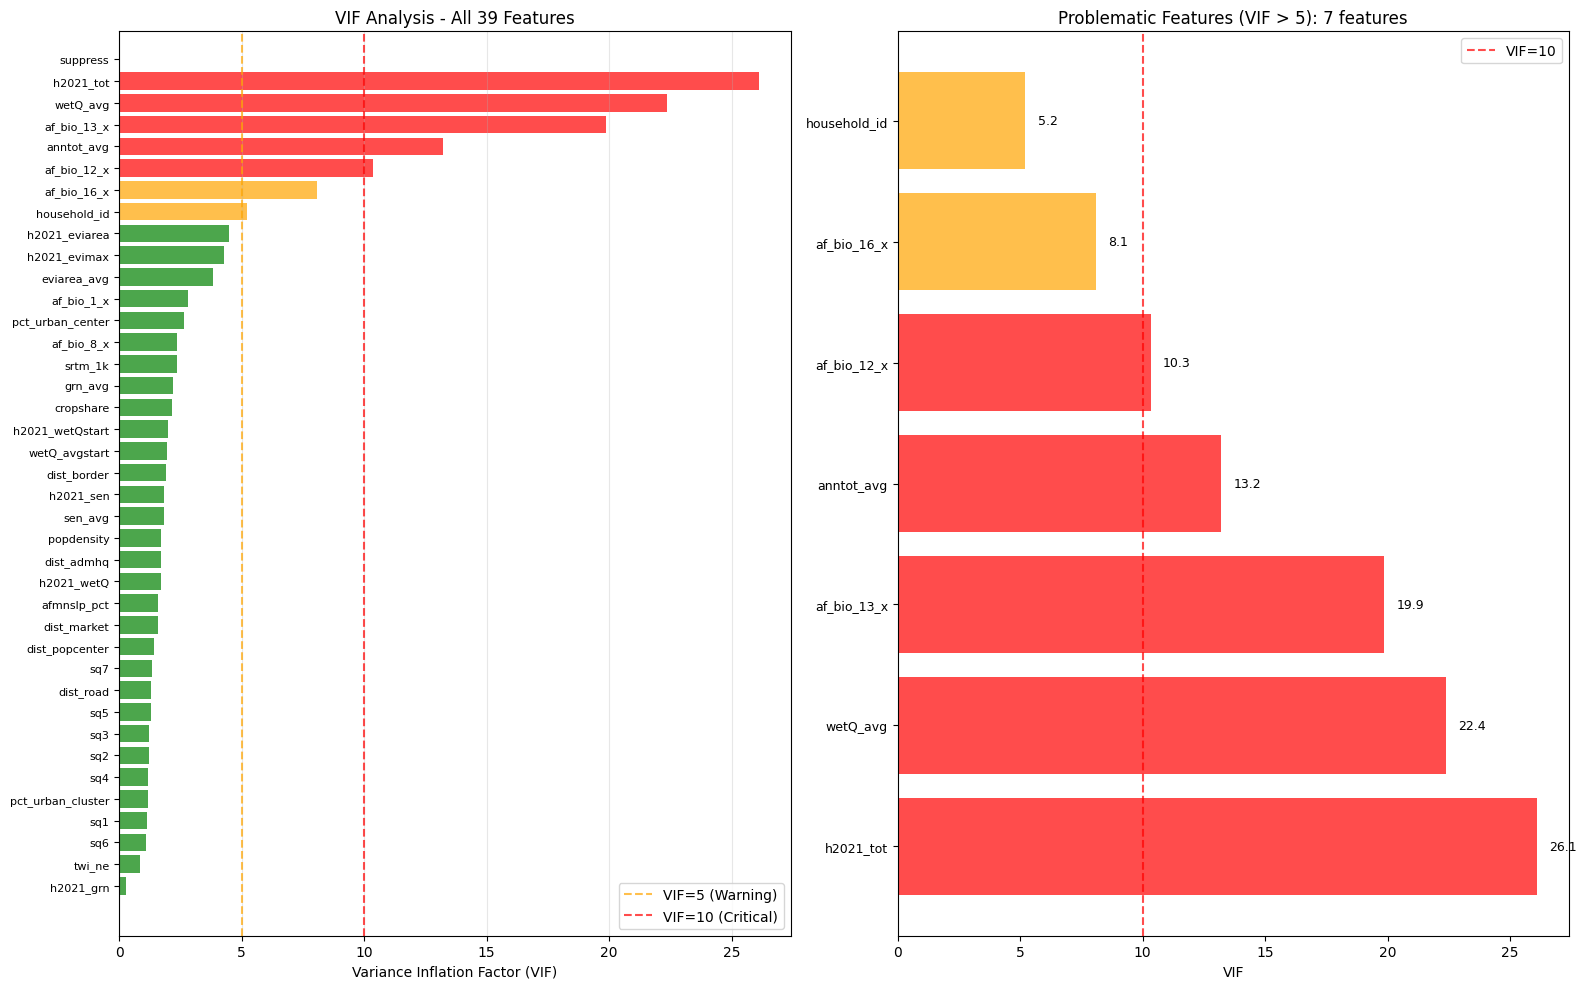


6. HIGHLY CORRELATED FEATURE PAIRS
----------------------------------------
Found 28 pairs with |correlation| > 0.8:
--------------------------------------------------------------------------------
Feature 1                      Feature 2                      Correlation 
--------------------------------------------------------------------------------
af_bio_1_x                     srtm_1k                              -0.985
evimax_avg                     h2021_evimax                          0.983
af_bio_13_x                    af_bio_16_x                           0.982
af_bio_1_x                     af_bio_8_x                            0.979
eviarea_avg                    h2021_eviarea                         0.963
af_bio_8_x                     srtm_1k                              -0.958
h2021_tot                      wetQ_avg                              0.947
sen_avg                        h2021_sen                             0.939
eviarea_avg                    evimax_avg    

In [4]:
# =============================================================================
# CORRELATION & VIF ANALYSIS - COMPLETE VERSION
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

print("\n" + "="*60)
print("COMPREHENSIVE CORRELATION AND VIF ANALYSIS")
print("="*60)

# =============================================================================
# 1. PREPARE DATA WITH ALL COLUMNS
# =============================================================================
print("\n1. PREPARING ALL DATA COLUMNS")
print("-"*40)

# Get ALL numerical columns from original dataframe
all_numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Total numerical columns in df: {len(all_numerical_cols)}")

# Create DataFrame with ALL numerical columns + target
full_data = df[all_numerical_cols].copy()

# Make sure AI_pca1 is included (it's already in df from your preprocessing)
print(f"Including target column: evimax_avg")

# Display column count
print(f"\nAnalyzing {len(full_data.columns)} columns total:")

# =============================================================================
# 2. COMPREHENSIVE CORRELATION HEATMAP WITH NUMBERS
# =============================================================================
print("\n2. CORRELATION HEATMAP (WITH VALUES)")
print("-"*40)

# Calculate correlation matrix
corr_matrix = full_data.corr()

# Determine figure size based on number of columns
n_cols = len(corr_matrix.columns)
fig_width = max(20, n_cols * 0.7)
fig_height = max(18, n_cols * 0.6)

plt.figure(figsize=(fig_width, fig_height))

# Create heatmap with numbers
sns.heatmap(corr_matrix,
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot=True,  # Show numbers
            annot_kws={'size': 8},  # Font size for numbers
            fmt='.2f',  # Format numbers to 2 decimal places
            xticklabels=True,
            yticklabels=True)

plt.title(f'Complete Correlation Matrix ({n_cols} columns)', fontsize=16, pad=20)
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# =============================================================================
# 3. TARGET-SPECIFIC CORRELATION ANALYSIS
# =============================================================================
print("\n3. TARGET CORRELATION ANALYSIS")
print("-"*40)

# Find correlations with AI_pca1
if 'AI_pca1' in corr_matrix.columns:
    target_corrs = corr_matrix['evimax_avg'].drop('evimax_avg').sort_values(key=abs, ascending=False)

    print(f"\nTop 10 features correlated with evimax_avg:")
    print("-"*50)
    for i, (feat, corr) in enumerate(target_corrs.head(10).items(), 1):
        direction = "positive" if corr > 0 else "negative"
        print(f"{i:2}. {feat:30} : {corr:7.3f} ({direction})")

    # Plot top correlations
    plt.figure(figsize=(12, 8))
    top_20 = target_corrs.head(20)

    # Create color gradient
    colors = plt.cm.RdYlBu_r((top_20.values + 1) / 2)

    bars = plt.barh(range(len(top_20)), top_20.values, color=colors, alpha=0.8)
    plt.yticks(range(len(top_20)), top_20.index)
    plt.axvline(x=0, color='black', linewidth=0.8)
    plt.xlabel('Correlation Coefficient')
    plt.title('Top 20 Features Correlated with AI_pca1')
    plt.grid(axis='x', alpha=0.3, linestyle='--')

    # Add correlation values on bars
    for i, (bar, val) in enumerate(zip(bars, top_20.values)):
        x_pos = val + (0.02 if val >= 0 else -0.05)
        plt.text(x_pos, i, f'{val:.3f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# =============================================================================
# 4. VIF ANALYSIS FOR ALL NUMERICAL FEATURES
# =============================================================================
print("\n4. VIF ANALYSIS FOR ALL NUMERICAL FEATURES")
print("-"*40)

# Remove target column for VIF calculation (if present)
features_for_vif = [col for col in full_data.columns if col != 'evimax_avg']
X_for_vif = full_data[features_for_vif].copy()

print(f"Calculating VIF for {len(X_for_vif.columns)} features...")

# Calculate VIF
def calculate_vif_safe(X_df, max_features=50):
    """Calculate VIF safely handling large datasets"""
    if len(X_df.columns) > max_features:
        print(f"  Note: Calculating VIF for {len(X_df.columns)} features may take time...")

    X_const = add_constant(X_df)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_const.columns

    vif_values = []
    for i in range(X_const.shape[1]):
        try:
            vif = variance_inflation_factor(X_const.values, i)
            vif_values.append(vif)
        except:
            vif_values.append(np.nan)

    vif_data["VIF"] = vif_values
    vif_data = vif_data[vif_data['feature'] != 'const']
    return vif_data.sort_values('VIF', ascending=False)

vif_results = calculate_vif_safe(X_for_vif)

print(f"\nVIF RESULTS SUMMARY:")
print("-"*60)
print(f"{'Feature':30} {'VIF':8} {'Status':12}")
print("-"*60)

# Display results with categorization
for _, row in vif_results.iterrows():
    vif_val = row['VIF']
    if pd.isna(vif_val):
        status = "ERROR"
        symbol = "?"
    elif vif_val > 10:
        status = "HIGH VIF"
        symbol = "🔴"
    elif vif_val > 5:
        status = "MODERATE"
        symbol = "🟡"
    else:
        status = "OK"
        symbol = "🟢"

    print(f"{symbol} {row['feature']:28} {vif_val:8.2f} {status:12}")

# =============================================================================
# 5. VIF VISUALIZATION
# =============================================================================
print("\n5. VIF VISUALIZATION")
print("-"*40)

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Plot 1: All VIF values
vif_sorted = vif_results.sort_values('VIF')
axes[0].barh(range(len(vif_sorted)), vif_sorted['VIF'],
             color=['red' if v > 10 else 'orange' if v > 5 else 'green'
                    for v in vif_sorted['VIF']],
             alpha=0.7)
axes[0].set_yticks(range(len(vif_sorted)))
axes[0].set_yticklabels(vif_sorted['feature'], fontsize=8)
axes[0].axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF=5 (Warning)')
axes[0].axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF=10 (Critical)')
axes[0].set_xlabel('Variance Inflation Factor (VIF)')
axes[0].set_title(f'VIF Analysis - All {len(vif_sorted)} Features')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Problematic features only
problematic = vif_results[vif_results['VIF'] > 5]
if len(problematic) > 0:
    axes[1].barh(range(len(problematic)), problematic['VIF'],
                 color=['red' if v > 10 else 'orange' for v in problematic['VIF']],
                 alpha=0.7)
    axes[1].set_yticks(range(len(problematic)))
    axes[1].set_yticklabels(problematic['feature'], fontsize=9)
    axes[1].axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF=10')
    axes[1].set_xlabel('VIF')
    axes[1].set_title(f'Problematic Features (VIF > 5): {len(problematic)} features')
    axes[1].legend()

    # Add VIF values on bars
    for i, (_, row) in enumerate(problematic.iterrows()):
        axes[1].text(row['VIF'] + 0.5, i, f'{row["VIF"]:.1f}',
                    va='center', fontsize=9)
else:
    axes[1].text(0.5, 0.5, 'No VIF issues!\nAll features have VIF < 5',
                ha='center', va='center', transform=axes[1].transAxes,
                fontsize=14, color='green')
    axes[1].set_title('No Multicollinearity Issues')

plt.tight_layout()
plt.show()

# =============================================================================
# 6. HIGHLY CORRELATED FEATURE PAIRS
# =============================================================================
print("\n6. HIGHLY CORRELATED FEATURE PAIRS")
print("-"*40)

threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > threshold:
            feat1, feat2 = corr_matrix.columns[i], corr_matrix.columns[j]
            high_corr_pairs.append((feat1, feat2, corr_val))

if high_corr_pairs:
    print(f"Found {len(high_corr_pairs)} pairs with |correlation| > {threshold}:")
    print("-"*80)
    print(f"{'Feature 1':30} {'Feature 2':30} {'Correlation':12}")
    print("-"*80)

    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{feat1:30} {feat2:30} {corr:12.3f}")
else:
    print(f"No feature pairs found with |correlation| > {threshold}")

# =============================================================================
# 7. COMPREHENSIVE SUMMARY
# =============================================================================
print("\n" + "="*60)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*60)

# Summary statistics
high_vif = vif_results[vif_results['VIF'] > 10]
moderate_vif = vif_results[(vif_results['VIF'] > 5) & (vif_results['VIF'] <= 10)]

print(f"\n📊 SUMMARY STATISTICS:")
print(f"  • Total columns analyzed: {len(full_data.columns)}")
print(f"  • Features with HIGH VIF (>10): {len(high_vif)}")
print(f"  • Features with MODERATE VIF (5-10): {len(moderate_vif)}")
print(f"  • Highly correlated pairs (|r| > 0.8): {len(high_corr_pairs)}")
print(f"  • Maximum VIF: {vif_results['VIF'].max():.2f}")
print(f"  • Average VIF: {vif_results['VIF'].mean():.2f}")

# Top correlations with target
if 'AI_pca1' in corr_matrix.columns:
    top_target_corr = target_corrs.head(3)
    print(f"\n🎯 TOP FEATURES FOR TARGET PREDICTION:")
    for feat, corr in top_target_corr.items():
        vif_val = vif_results[vif_results['feature'] == feat]['VIF'].values[0] if feat in vif_results['feature'].values else np.nan
        print(f"  • {feat}: correlation = {corr:.3f}, VIF = {vif_val:.2f}")

# Recommendations
print(f"\n⚠️  RECOMMENDATIONS:")
if len(high_vif) > 0:
    print(f"  1. Consider removing features with VIF > 10:")
    for _, row in high_vif.head(5).iterrows():
        print(f"     - {row['feature']} (VIF = {row['VIF']:.1f})")
if len(high_corr_pairs) > 0:
    print(f"  2. Check these highly correlated pairs for redundancy")
if len(high_vif) == 0 and len(high_corr_pairs) == 0:
    print("  ✓ No major multicollinearity issues detected!")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)

# Store results for later use
analysis_results = {
    'correlation_matrix': corr_matrix,
    'vif_results': vif_results,
    'high_correlation_pairs': high_corr_pairs,
    'target_correlations': target_corrs if 'AI_pca1' in corr_matrix.columns else None
}

print("\nResults stored in 'analysis_results' dictionary")